In [1]:
import pandas as pd
import numpy as np
import glob
import os

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import linregress

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_r2(X, y):
    if len(X.shape)<2:
        r2 = LinearRegression().fit(StandardScaler().fit_transform(X.values.reshape(-1, 1)), y).score(StandardScaler().fit_transform(X.values.reshape(-1, 1)), y)
    else:
        r2 = LinearRegression().fit(StandardScaler().fit_transform(X.values), y).score(StandardScaler().fit_transform(X.values), y)
    return r2
        

In [3]:
path = '/media/data/HCPAging/data/MLTablesMultCon/output_5cv_sexAdj_noStdTarg_STDstackFeatures/'

In [4]:
df_age = pd.read_csv(path+'output_5cv_sexAdj_noStdTarg_STDstackFeatures_interview_age/all_fold_y-pred_y-obs.csv', index_col=0)
df_age_train = pd.read_csv(path+'output_5cv_sexAdj_noStdTarg_STDstackFeatures_interview_age/all_fold_y-pred_y-obs_train.csv', index_col=0)
df_cog_tot = pd.read_csv(path+'output_5cv_sexAdj_noStdTarg_STDstackFeatures_nih_totalcogcomp_unadjusted/all_fold_y-pred_y-obs.csv', index_col=0)
df_cog_cry = pd.read_csv(path+'output_5cv_sexAdj_noStdTarg_STDstackFeatures_nih_crycogcomp_unadjusted/all_fold_y-pred_y-obs.csv', index_col=0)
df_cog_flu = pd.read_csv(path+'output_5cv_sexAdj_noStdTarg_STDstackFeatures_nih_fluidcogcomp_unadjusted/all_fold_y-pred_y-obs.csv', index_col=0)

In [5]:
cog_orig_tot = df_cog_tot['y_real']
cog_orig_cry = df_cog_cry['y_real']
cog_orig_flu = df_cog_flu['y_real']

age_orig = df_age['y_real']


Predicting cognition with age
 
total cognition
R-Squared age-orig, cognition  total r2= 0.11
Correlation age-orig, cognition total r= -0.332 pval= 0.0


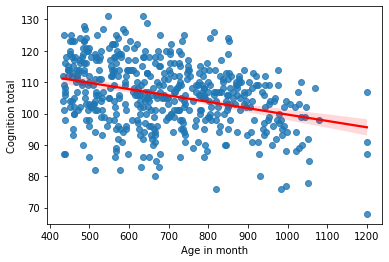

 
crystal cognition
R-Squared age-orig, cognition  crystal r2= 0.019
Correlation age-orig, cognition crystal r= 0.137 pval= 0.00209


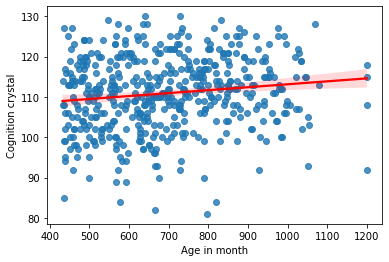

 
fluid cognition
R-Squared age-orig, cognition  fluid r2= 0.321
Correlation age-orig, cognition fluid r= -0.566 pval= 0.0


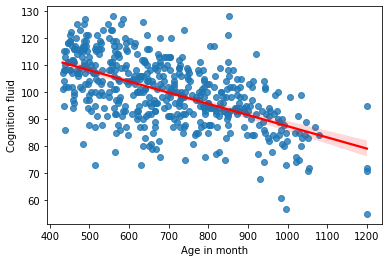

In [6]:
print('Predicting cognition with age')
print(' ')
for cog_orig, ttype in zip([cog_orig_tot, cog_orig_cry, cog_orig_flu], ['total', 'crystal', 'fluid']):
    print(ttype, 'cognition')
    print('R-Squared age-orig, cognition ', ttype, 'r2=', get_r2(age_orig, cog_orig).round(3))
    print('Correlation age-orig, cognition', ttype, 'r=', pearsonr(age_orig, cog_orig)[0].round(3), 'pval=', pearsonr(age_orig, cog_orig)[1].round(5))
    sns.regplot(x=age_orig, y=cog_orig,line_kws={"color": "red"})
    plt.xlabel('Age in month')
    plt.ylabel('Cognition '+ttype)
    plt.show()
    print(' ')

In [7]:
dct = {}
for cog_orig, ttype in zip([cog_orig_tot, cog_orig_cry, cog_orig_flu], ['total', 'crystal', 'fluid']):
    dct[ttype] = pd.Series([get_r2(age_orig, cog_orig),
                            pearsonr(age_orig, cog_orig)[0],
                            pearsonr(age_orig, cog_orig)[1]], index=['r2', 'cor', 'pval'])
display(pd.DataFrame(dct))

,total,crystal,fluid
r2,1.098985e-01,0.018698,3.207319e-01
cor,-3.315094e-01,0.136741,-5.663319e-01
pval,2.155175e-14,0.002093,4.353601e-44


In [8]:
pd.DataFrame(dct).to_csv('/media/data/HCPAging/data/MLTablesMultCon/output_5cv_sexAdj_noStdTarg_STDstackFeatures/r2_cor_ageorig_cogorig.csv')